<a href="https://colab.research.google.com/github/djgreen/AI-BootCamp/blob/main/AIBootCampNumpyIntro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**All About Numerical Python aka NumPy**
**Authors**: 
- Dr. Jany Chan, The Ohio State University
- Dr. Chaitanya Kulkarni, The Ohio State University
- Prof. Raghu Machiraju, The Ohio State University

---

## Context 

The material here was developed by the authors for a [professional masters course in data analytics](https://tdai.osu.edu/education/masters-translational-data-analytics). The enrolled students are often from all academic backgrounds. MDs, PharmDs, MBAs, etc. The goal of that program is to teach to **_data story telling_** in context.

---

## Objectives
- Learn basics of Numpy
- Learn about working with **1D** and **nD** arrays
- Learn why Numpy arrays are more efficient performance-wise
- Learn how to use Numpy arrays in practical settings (audio and image files)

**We strongly encourage you to use the pertinent Scarlet Carmen pages to discuss problems and points of uncertainty**. If you're stuck on a problem, it's very likely that someone else in the course is having/had a similar issue.

---

# 1.0 What is  NumPy?

[NumPy](http://www.numpy.org) is the fundamental package for scientific computing in Python. At the core of the NumPy package, is the `ndarray` object, a multi- or **n-dimensional array**. NumPy `arrays` are efficient for high-performance computing because (1) it can only contain homogeneous data types and (2) the underlying code for many operations is compiled using C for better performance. NumPy is not part of a basic Python installation and normally needs to be installed after installing Python. However, it is a default package in Google Colab; therefore, it simply needs to be imported into your working environment.

To reiterate, NumPy: 
* Provides an efficient interface to store and operate on dense data buffers.
* NumPy `arrays` are like Python's built-in ``list`` type 
* NumPy `arrays` allow efficient storage and data operations for very large data.
* NumPy `arrays` are the foundation of many core data science tools in Python.

Refer to [Chapter 4. NumPy Basics: Arrays and Vectorized Computation](https://learning.oreilly.com/library/view/python-for-data/9781491957653/ch04.html#numpy_dtypes) for more information.


---

### Why use NumPy?
* Fast *vectorized* `array` operations for data cleaning and pre-processing, subsetting and filtering, transformation, etc.
* Common `array` algorithms like sorting, unique, and set operations
* Efficient descriptive statistics (mean, etc.) and aggregating/summarizing   data
* Expressing conditional logic as array expressions instead of loops with if-elif-else branches (like R)



---


To begin, let's import NumPy into our working environment and check the version.

In [ ]:
import numpy as np  
np.__version__



'1.21.6'


## 1.1 NumPy Arrays

We have already seen Python `lists` which are similar to 1-dimensional arrays. Recall the Palindrome example in the previous module: mixed data structures could be stored in a `list`. However, in order to gain this flexibility, we lose performance. NumPy `arrays` are the opposite: to gain performance, we lose flexibility: a NumPy `array` can only store a single data type (e.g., `ints` or `floats` but not both in the same array). 

By only allowing one data type, many operations can be performed in parallel. In contrast, list operations are typically performed sequentially; we need to iterate over each value in a `list` when applying the operation. This makes `lists` extremely inefficient when we need to work with big data.


---


An array is a grid of values that contains:
1. information about the raw data
2. how to locate an element
3. how to interpret an element

As a simple example, we can create a NumPy `array` from a Python `list`. 

The elements must be of the same data type, referred to as the `dtype`. The `rank` of the array is the number of its dimensions, while the `shape` of the array is a tuple of integers giving the size along each dimension.

**Note**: Multi-dimensional NumPy arrays can be created using nested lists for two- or higher-dimensional data.

In [ ]:
# Create an array object using a list
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]])
 
# Print the type of our `arr` object
print("Object is of type: ", type(arr))
 
# Print the dimensions of the array (axes)
print("No. of dimensions: ", arr.ndim)
 
# Print the shape of the array as (row, col)
print("Shape of array: ", arr.shape)
 
# Print the size (total number of elements) of the array
print("Size of array: ", arr.size)
 
# Print the type of elements in the array
print("Array stores elements of type: ", arr.dtype)

# Note: Recall that `type()` is a built-in Python function, hence the presence of the ()
# The other 4 (ndim, shape, size, and dtype) are variables defined in the class ndarray.
# These 4 are specific to their associated array object.


Object is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (2, 3)
Size of array:  6
Array stores elements of type:  int64




---
 

There are 5 general ways to create a NumPy `array`:
1.   Loading data from disk or memory (**Section 1.2**)
2.   Conversion from other Python structures (**Section 1.3**)
3.   Intrinsic NumPy array creation functions (**Section 1.3**)
4.   Use of special library functions (**Section 1.3**)
5.   Replicating, joining, or mutating existing arrays (Notebook 4)

We'll touch on the first 4 methods in this Notebook and focus on #5 in the next Notebook.


---




## 1.2 Loading data into a NumPy array

To see how NumPy `arrays` can be created and utilized, here are some typical datasets that can be analyzed using NumPy.

*   collections of documents (single column of values)
*   images
    *   2-D for greyscale images
    *   3-D for color images
*   measurements (audio, temperature, pressure, etc.).
*   time series

### 1.2.1 CSV files: Working with Measurements (1-D)

We normally collect numeric measurements like height of humans, daily temperature, or stock prices. Here, we will look at the commonly used dataset:  California Housing Prices. This sample dataset is built-in to Google Colab. To access it, follow the instructions on Line 8 in the code cell below.

Text(0, 0.5, 'Count')

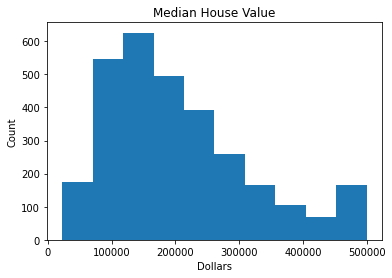

In [ ]:
# matplotlib is a basic visualization package
%matplotlib inline
import matplotlib.pyplot as plt  

# Locate the dataset by clicking on the file icon on the left panel.
# Click on the directories to navigate the file system.
# Double click on the file to preview the data (only works on small datasets).
# Right click and select "Copy path" then paste it as a string into Line 9.
my_file = '/content/sample_data/california_housing_test.csv'

# Read the data in the file into a NumPy array.
# NumPy has a function `genfromtxt()` that is commonly used to import data.
# More info here: https://numpy.org/doc/stable/user/basics.io.genfromtxt.html

numpy_arr = np.genfromtxt(my_file,
                          delimiter=',',
                          dtype=np.int32, 
                          encoding=None,
                          skip_header=1)

# Just like Python lists, we can select columns by indexing
# For example, we can use negative indexing to select the last column, "median house value"
data = numpy_arr.T[-1]

# Plot the data for visualization
plt.hist(data)                      # Plot data as a histogram
plt.title('Median House Value')     # Title of graph
plt.xlabel('Dollars')               # x-axis
plt.ylabel('Count')                 # y-axis



### 1.2.2 Audio files: Working with Signals (1-D)

As mentioned above, NumPy is one of the foundational packages for data analysis and machine learning in Python. In practice, NumPy is rarely utilized as a standalone package for data analysis or machine learning, except to either transform the data or convert it to a different data strucure. Most of the time, there are domain-specific packages that are built on top of NumPy.

One example is the [SciPy package](https://www.scipy.org/), which is a multi-purpose package of open-source software for mathematics, science, and engineering, including audio analysis. Sound clips can be seen as one-dimensional arrays of sound intensity vs. time. You can "read" a test.wav file that includes a few notes and play it for yourself. 

In [ ]:
# First, you'll need to install the SciPy package in Line 3
# These 2 packages are domain-specific (ie audio analysis)
from scipy.io.wavfile import read, write
from IPython.display import Audio
from io import BytesIO
from urllib.request import urlopen

# We've seen multiple ways to import data into Colab (Refer to Notebook 1)
# Try importing the sound file given the URL in Line 13.


# Here, we'll start with a Google Drive share link:
my_link = 'https://drive.google.com/file/d/12zE-QI62-V2Nmmejq3lulLV9k_wbKbdc/view?usp=sharing'

# Isolate the file ID
id = '12zE-QI62-V2Nmmejq3lulLV9k_wbKbdc'

# Borrow the Google downloader again
url = 'https://drive.google.com/uc?export=download&id=' + id

# Convert the raw binary back into a file
my_file = BytesIO(urlopen(url).read())

# Finally, use the SciPy reader to load the file into a NumPy array called 'data'
# If you need more information about the SciPy read() function, where can you find it?
Fs, data = read(my_file)
print("\n Sampling Frequency is", Fs)

# 'Audio' puts an audio player in the cell below. What happens when you play it?
Audio(data, rate=Fs)




 Sampling Frequency is 11025


In [ ]:
# Sounds like gibberish, right? What happens when you reverse the audio?
# First, let's check how many dimensions are in `data`
print(f'There are {data.ndim} dimensions in data.\n')

# Since data is 1-D, we can reverse it just like a Python list
Audio(data[::-1], rate=Fs)



There are 1 dimensions in data.



### 1.2.3 Image files: Working with images (2-D or 3-D)

Digital images can be viewed as 2-D or even 3-D arrays of numbers where each number represents the intensity and/or color of a single pixel.  The example below shows how arrays can be used for images.  

First, go to Google and download an image. Next, drag and drop that image into the **sample_data** folder on the left panel. Recall that you can right click and copy the file path. 

Alternatively, can you pull the image directly from a URL?


(600, 1200, 3)

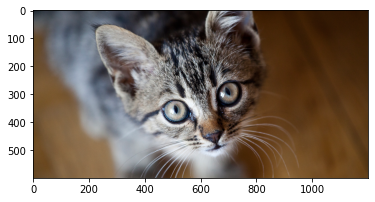

In [ ]:
# Based on the code below, why do we need the PIL module?
from matplotlib.pyplot import imshow
from PIL import Image
from requests import get
from io import BytesIO

# Note how this URL ends with a file format, like .csv and .doc
response = get('https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png')
my_file = BytesIO(response.content)

image = Image.open(my_file)
arr = np.array(image)
imshow(arr)
arr.shape


In [ ]:
# What happens when you print your image as a NumPy array?
print(arr)

# Why is this dataset so complex? Check the number of dimensions in `arr`
print(f'\nThere are {arr.ndim} dimensions in the image.')
print(f'There are {arr.shape[0]} values in the image height.')
print(f'There are {arr.shape[1]} values in the image width.')
print(f'There are {arr.shape[2]} (color) channels: red, green, and blue.')

# How are we supposed to make sense of this output?
# We'll build up to 3-D arrays in the next section...



[[[ 44  49  56]
  [ 34  38  44]
  [ 31  33  42]
  ...
  [ 46  22   3]
  [ 44  20   2]
  [ 44  19   3]]

 [[ 45  48  56]
  [ 35  41  46]
  [ 32  41  48]
  ...
  [ 41  17   3]
  [ 42  19   2]
  [ 45  21   2]]

 [[ 42  47  53]
  [ 31  38  42]
  [ 32  41  45]
  ...
  [ 43  19   2]
  [ 44  19   2]
  [ 41  18   2]]

 ...

 [[109  81  46]
  [ 98  69  31]
  [ 99  71  33]
  ...
  [ 97  65  23]
  [ 97  66  26]
  [ 97  66  25]]

 [[107  78  43]
  [ 98  69  33]
  [ 96  69  32]
  ...
  [103  68  27]
  [ 97  65  24]
  [ 98  67  26]]

 [[112  82  47]
  [100  72  35]
  [104  74  34]
  ...
  [ 97  64  26]
  [ 93  62  22]
  [101  68  29]]]

There are 3 dimensions in the image.
There are 600 values in the image height.
There are 1200 values in the image width.
There are 3 (color) channels: red, green, and blue.


## 1.3 Creating NumPy arrays from scratch

### 1.3.1 Common NumPy functions for creating arrays

It is more efficient to create arrays from scratch using routines built into NumPy, especially when dealing with larger arrays. Don't worry about memorizing these; NumPy has over 40 built-in functions for creating arrays. Just know that they exist and [how to find them in the NumPy documentation](https://numpy.org/doc/stable/user/basics.creation.html). 

Here are several examples:

In [ ]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=np.int8)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [ ]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### 1.3.2 Creating multi-dimensional NumPy arrays

NumPy arrays can be multi-dimensional. When using the NumPy functions, the `size` parameter is a tuple of the desired dimensions for creating n-dimensional arrays rather than a length when creating 1-D arrays. Note that the order of the tuple is always (row, col). 

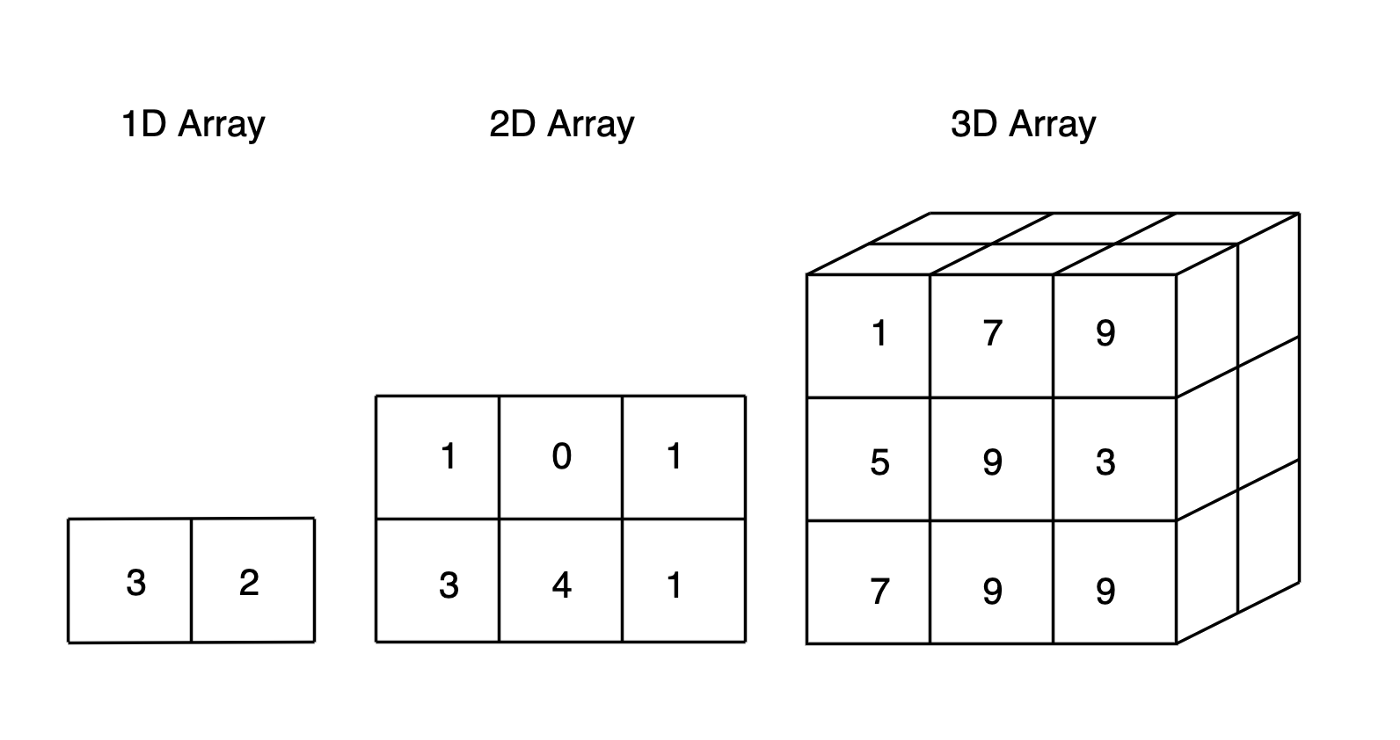

In [ ]:
# Creating n-dimensional arrays
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

x = [x1, x2, x3]
for i, arr in enumerate(x, 1):
    print(f"x{i} ndim: ", arr.ndim)
    print(f"x{i} shape:", arr.shape)
    print(f"x{i} size: ", arr.size)
    print()

# Now display each array. How are the different dimensions represented?



x1 ndim:  1
x1 shape: (6,)
x1 size:  6

x2 ndim:  2
x2 shape: (3, 4)
x2 size:  12

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60



There are built-in functions that efficiently generate NumPy arrays. Don't worry about memorizing every one. Just know where to find them if/when you ned one. Below are some examples; note that most require a tuple containing the dimensions of the array we want to generate.

In [ ]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=np.float64)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
# Create a 5x3 array filled with 3.14
np.full((5, 3), 3.14)

array([[3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14]])

In [ ]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[ 1.25441407,  1.41910204, -0.74385608],
       [-2.5174371 , -1.50709602,  1.14907613],
       [-1.19357825,  1.14104245,  1.50944508]])

In [ ]:
# Nested lists result in multi-dimensional arrays
# Recall list comprehensions from the previous module
test = np.array([range(i, i + 3) for i in [2, 4, 6]])

# In English, what is happening in Line 3?
print(test)
test[-2, -1]

[[2 3 4]
 [4 5 6]
 [6 7 8]]


6

## 1.4 Performance of NumPy arrays

NumPy arrays trade flexibility (require a single data type) for performance (faster computations). Let's dig a little deeper into this. 

First, the trade off:

- Python `lists` can have mixed data types.
- NumPy requires that `arrays` contain the same data type.
- If you mix data types, NumPy will try to upcast when possible to maintain a single data type.

In [ ]:
 # Because of the first element, the integers are up-cast to floating points
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

To explicitly set the data type,  use the `dtype` keyword. NumPy `arrays` have standard NumPy data types as listed in the following table.

```python
np.zeros(10, dtype='int16')
```

Or using the associated NumPy object:

```python
np.zeros(10, dtype=np.int16)
```

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

Finally, we can convery between data types using the `astype()` function. This is especially useful when cleaning Excel data where numerics and strings can be used interchangably.

In [ ]:
# Convert between data types using the function astype()
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
cleaned = numeric_strings.astype(np.float16)
cleaned

array([ 1.25, -9.6 , 42.  ], dtype=float16)

### 1.4.1 Arrays require less memory

Let's revisit the California Housing Prices dataset from above. When we loaded the data into a NumPy `array`, We explicitly declared a data type of `int32` on Line 16 in the code block. The *int* indicates that the value is an integer and the *32* refers to how much memory is required to store one value (i.e., one integer is encoded by 32 bits or 4 bytes). There are 8 bits in 1 byte, where a bit is either a "1" or a "0". 

This is the data type with the smallest memory requirement that also captures the range of our data: median house values span from 0 to 500,000. `int32` encodes integer values from -2147483648 to 2147483647 (in other words, 2^32 divided by 2 to account for both positive and negative values).

Evaluate the following code cell to see why this is useful...

In [ ]:
import sys

# Check the data type using dtype
# Note that dtype is a class not a function, hence it does not require the ()
data_type = str(data.dtype)

print(f'NumPy array contains the data type: {data_type}\n')
print('By explicitly defining the minimal data type needed to encode our dataset,'\
      '\nwe can reduce the total amount of memory required.\n')


# Convert the original NumPy array into a basic Python list
list1 = data.tolist()


# Use sys.getsizeof() to calculate the memory requirement of each data structure
list_memory = sys.getsizeof(list1)
array_memory = data.nbytes # data.size * data.itemsize
improvement = (list_memory - array_memory) / list_memory * 100

print(f'Size of Python list: {list_memory} bytes')
print(f'Size of NumPy array of {data_type}: {array_memory} bytes')
print(f'Reduction in memory = {round(improvement, 2)}%')



NumPy array contains the data type: uint8

By explicitly defining the minimal data type needed to encode our dataset,
we can reduce the total amount of memory required.

Size of Python list: 521336 bytes
Size of NumPy array of uint8: 65160 bytes
Reduction in memory = 87.5%


**Note**: To learn more about the memory requirements of different data types, 
refer to:
*   https://www.pythoninformer.com/python-libraries/numpy/data-types/
---

### 1.4.2 Calculations on arrays have faster runtimes

Let's compare the computational performance of a NumPy `array` versus the built-in Python `list`. We'll create one of each data structure containing the same type and size of values and then perform a typical operation. 

**Note**: We can use `%time` to estimate the runtime of this operation. We'll explore these "magic functions" in the next module about Code Optimization.

In [ ]:
#my_arr = np.arange(10000000)
#my_list = list(range(10000000)
import numpy as np
my_arr = np.arange(100)
my_list = list(range(100))

# Testing a NumPy array
%time for _ in range(10): my_arr2 = my_arr * 2

# Testing a Python list
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 217 µs, sys: 0 ns, total: 217 µs
Wall time: 14.7 ms
CPU times: user 116 µs, sys: 0 ns, total: 116 µs
Wall time: 119 µs


## 1.5 Data copying and memory

Array slices return views or reference (pointers to a memory address rather than new copies of the array data. This results in significant memory savings.

In contrast, when operating on and manipulating arrays, their data are sometimes copied into a new array and sometimes not. This is often a source of confusion. For more information, refer to NumPy: Copies and Views

In [ ]:
x2 = np.arange(35).reshape(7, 5)  
print(f'2-D array =\n{x2}\n')

# Let's extract a 2x2 subarray from x2
x2_sub = x2[:2, :2]
print(f'Subarray: \n{x2_sub}\n')

# If we modify an element in the subarray, the original array is also changed
x2_sub[0, 0] = 99
print(f'Modified subarray: \n{x2_sub}\n')

print(f'2-D array: \n{x2}')

2-D array =
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]]

Subarray: 
[[0 1]
 [5 6]]

Modified subarray: 
[[99  1]
 [ 5  6]]

2-D array: 
[[99  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]]


### 1.5.1 Creating copies of arrays

Sometimes it is useful to explicitly copy data with the ``copy()`` method. It returns **a copy of the original array stored at a new location in memory**. The copy doesn’t share data or memory with the original array. Any modifications in one array are not reflected in the copy. 

The copy function is also known as **deep copy**. When working with large datasets, this will utilize a significant (if not all) of your system resources (i.e. if the original dataset required 500MB of memory, 1 deep copy = 1GB, etc).

In [ ]:
# The copy() function creates a deep copy
x2_sub_copy = x2[:2, :2].copy()
print(f'Deep copy of subarray: \n{x2_sub_copy}\n')

# If we modify this copy, the original is not affected
x2_sub_copy[0, 0] = 42
print(f'Modified copy: \n{x2_sub_copy}\n')

print(f'2-D array: \n{x2}')

Deep copy of subarray: 
[[99  1]
 [ 5  6]]

Modified copy: 
[[42  1]
 [ 5  6]]

2-D array: 
[[99  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]]
